# Water quality

Этот набор данных, служит примером для описания качества воды в городе. Итак наша задача состоиит в следующем: по данным дата фрейма определить, возможно ли употреблять данную воду.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore')
tmp = "D:/university/ML/waterQuality1.csv"
data_f = pd.read_csv(tmp)
print(data_f)

      aluminium ammonia  arsenic  barium  cadmium  chloramine  chromium  \
0          1.65    9.08     0.04    2.85    0.007        0.35      0.83   
1          2.32   21.16     0.01    3.31    0.002        5.28      0.68   
2          1.01   14.02     0.04    0.58    0.008        4.24      0.53   
3          1.36   11.33     0.04    2.96    0.001        7.23      0.03   
4          0.92   24.33     0.03    0.20    0.006        2.67      0.69   
...         ...     ...      ...     ...      ...         ...       ...   
7994       0.05    7.78     0.00    1.95    0.040        0.10      0.03   
7995       0.05   24.22     0.02    0.59    0.010        0.45      0.02   
7996       0.09    6.85     0.00    0.61    0.030        0.05      0.05   
7997       0.01      10     0.01    2.00    0.000        2.00      0.00   
7998       0.04    6.85     0.01    0.70    0.030        0.05      0.01   

      copper  flouride  bacteria  ...   lead  nitrates  nitrites  mercury  \
0       0.17      0.05

# Description

All attributes are numeric variables and they are listed bellow:
* aluminium - dangerous if greater than 2.8
* ammonia - dangerous if greater than 32.5
* arsenic - dangerous if greater than 0.01
* barium - dangerous if greater than 2
* cadmium - dangerous if greater than 0.005
* chloramine - dangerous if greater than 4
* chromium - dangerous if greater than 0.1
* copper - dangerous if greater than 1.3
* flouride - dangerous if greater than 1.5
* bacteria - dangerous if greater than 0
* viruses - dangerous if greater than 0
* lead - dangerous if greater than 0.015
* nitrates - dangerous if greater than 10
* nitrites - dangerous if greater than 1
* mercury - dangerous if greater than 0.002
* perchlorate - dangerous if greater than 56
* radium - dangerous if greater than 5
* selenium - dangerous if greater than 0.5
* silver - dangerous if greater than 0.1
* uranium - dangerous if greater than 0.3
* is_safe - class attribute {0 - not safe, 1 - safe}

In [2]:
data_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

object означает наличие пропущенных значений в ammonia и в is_safe

In [3]:
data_f['is_safe'].value_counts()

0        7084
1         912
#NUM!       3
Name: is_safe, dtype: int64

У целевого признака (is_safe) наблюдается несбалансированность классов: обьектов класса 0 больше, чем объектов класса 1

In [4]:
data_f.isna().sum()

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

Итак мы имеем следующее:
    N (число объектов) - 7999  
    d (число признаков) - 20  
    K (количество классов) - 2  
    Наличие пропущенных значений - да, но их очень мало, то есть < 0.01%   
    Разнородные признаки - да  
    Несбалансированные классы - 89/11  
    Большое количество выбросов - нет  
    Большое количество выбросов - нет  
    Наличие текстовых признаков нет  
    

# 2 Вычисление основных характеристик(среднее, разброс, корреляционную матрицу и т.д)

In [5]:
data_f.describe()

,aluminium,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
count,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000
mean,0.666158,0.161445,1.567715,0.042806,2.176831,0.247226,0.805857,0.771565,0.319665,0.328583,0.099450,9.818822,1.329961,0.005194,16.460299,2.920548,0.049685,0.147781,0.044673
std,1.265145,0.252590,1.216091,0.036049,2.567027,0.270640,0.653539,0.435373,0.329485,0.378096,0.058172,5.541331,0.573219,0.002967,17.687474,2.323009,0.028770,0.143551,0.026904
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.405000,0.000000,0.002000,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000
50%,0.070000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,0.008000,0.102000,9.930000,1.420000,0.005000,7.740000,2.410000,0.050000,0.080000,0.050000
75%,0.280000,0.100000,2.480000,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,0.700000,0.151000,14.610000,1.760000,0.008000,29.480000,4.670000,0.070000,0.240000,0.070000
max,5.050000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,1.000000,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000


Для всех количественных признаков приведены средние значения, стандартное отклонение, минимальное и макимальное значения, медиана и значения квартилей.

In [6]:
matrix_cor = data_f.corr()
print(matrix_cor)

             aluminium   arsenic    barium   cadmium  chloramine  chromium  \
aluminium     1.000000  0.225773  0.294145 -0.099911    0.369309  0.353218   
arsenic       0.225773  1.000000  0.362945  0.334682    0.356559  0.312475   
barium        0.294145  0.362945  1.000000 -0.037803    0.446928  0.415972   
cadmium      -0.099911  0.334682 -0.037803  1.000000   -0.144370 -0.157766   
chloramine    0.369309  0.356559  0.446928 -0.144370    1.000000  0.555938   
chromium      0.353218  0.312475  0.415972 -0.157766    0.555938  1.000000   
copper        0.168612 -0.036444  0.065426 -0.109024    0.119059  0.113043   
flouride     -0.009784  0.003792 -0.018548  0.004880    0.004400 -0.002284   
bacteria     -0.078238  0.035688  0.101259 -0.092431    0.154510  0.142041   
viruses      -0.070863  0.011703 -0.002276  0.021183    0.003687  0.002430   
lead          0.020792 -0.087756 -0.042888 -0.034959   -0.030479 -0.050501   
nitrates     -0.003810  0.027554 -0.011331  0.020194   -0.001551

Построим диаграммы рассеивания

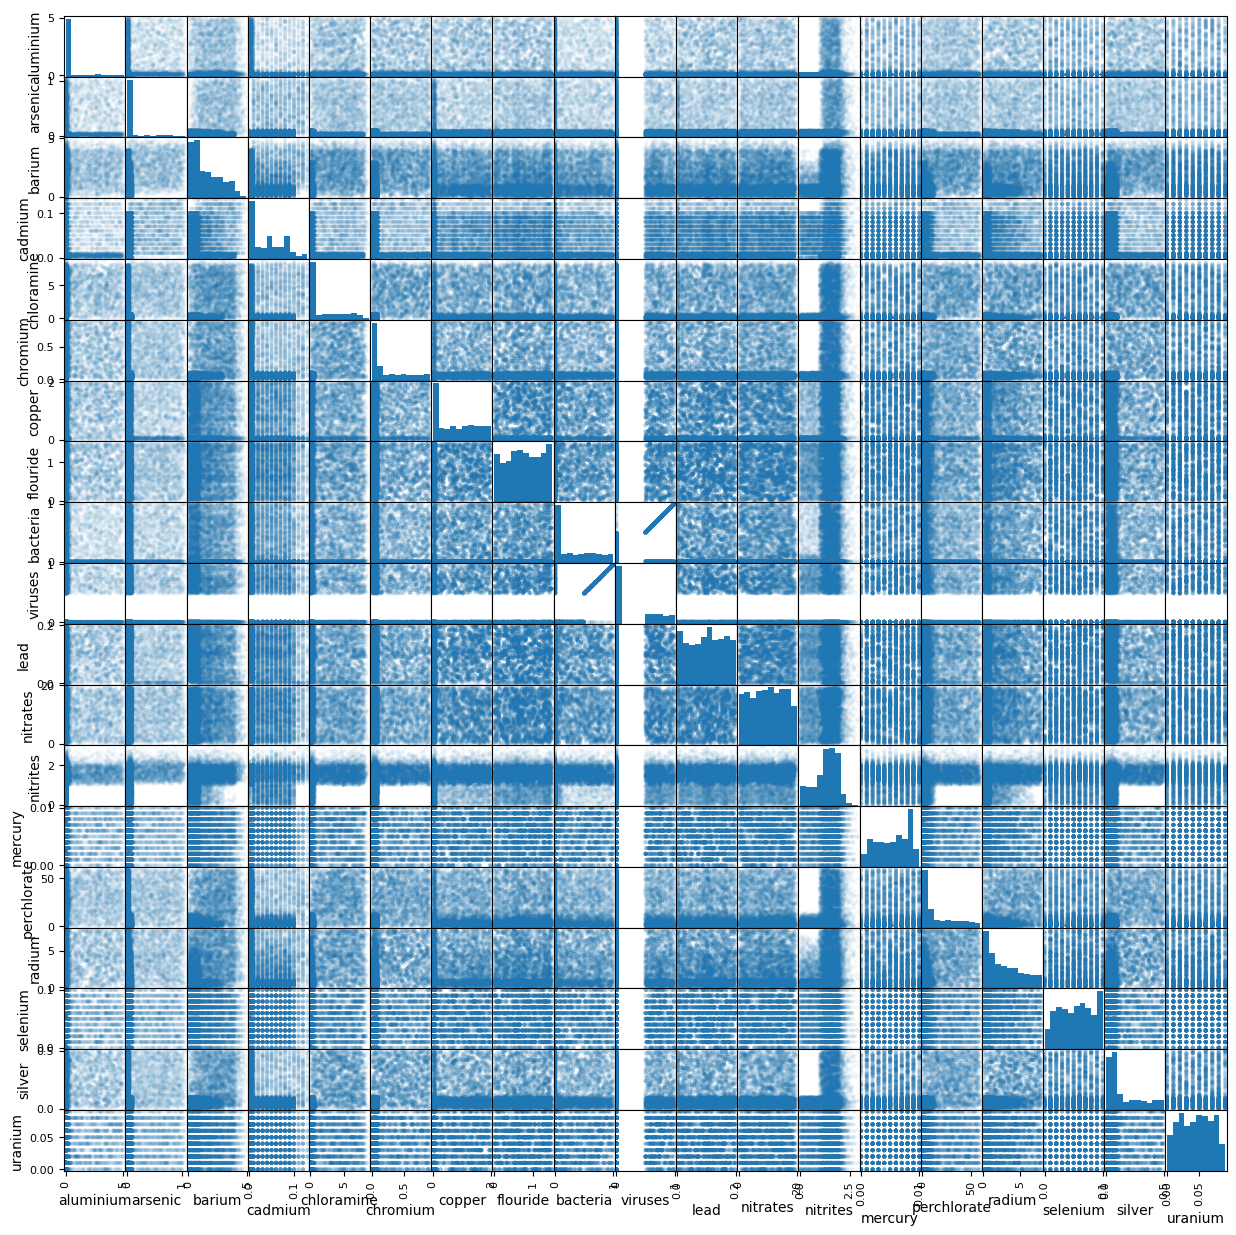

In [7]:
scatter_matrix(data_f, alpha = 0.05, figsize = (15,15))
pass

Из получившегося рисунка видно, что есть признаки которые коррелируют между собой, а именно признак: bacteria и viruses.

In [8]:
matrix_cor.where(np.triu(matrix_cor > 0.5, k=1)).stack().sort_values(ascending=False)

bacteria     viruses        0.618480
chloramine   perchlorate    0.588769
             chromium       0.555938
chromium     perchlorate    0.524532
chloramine   silver         0.522447
chromium     silver         0.510768
perchlorate  silver         0.504604
dtype: float64

# 3 Обработка пропущенных значений.

Найдем признаки, которые имеют пропущенные значения

In [9]:
data_f.isna().sum()

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

Кажется, что пропущенных значений нет, однако в ammonia и в is_safe наблюдается #NUM!. Заменим это значение на 0. 

In [10]:
data_f = data_f.replace({'ammonia':'#NUM!','is_safe':'#NUM!'}, .0)
data_f = data_f.replace({'ammonia':'0','is_safe':'0'}, .0)
data_f = data_f.replace({'ammonia':'1','is_safe':'1'}, 1.)
data_f = data_f.astype({'ammonia': float})
data_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   float64
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

# 4 Обработка категориальных признаков.

In [11]:
data_f = pd.get_dummies(data_f)
data_f.shape

(7999, 21)

In [12]:
data_f.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1.0
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1.0
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0.0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1.0
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1.0


# 5 Нормализация

In [13]:
data_f_tmp = (data_f - data_f.min(axis = 0))/(data_f.max(axis = 0) - data_f.min(axis = 0))
data_f_tmp.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,0.326733,0.306150,0.038095,0.576923,0.053846,0.040323,0.922222,0.085,0.033333,0.20,...,0.270,0.810893,0.385666,0.7,0.629062,0.848561,0.8,0.68,0.222222,1.0
1,0.459406,0.709893,0.009524,0.670040,0.015385,0.608295,0.755556,0.330,0.600000,0.65,...,0.500,0.101362,0.658703,0.3,0.537577,0.401752,0.8,0.54,0.555556,1.0
2,0.200000,0.471257,0.038095,0.117409,0.061538,0.488479,0.588889,0.010,0.660000,0.05,...,0.390,0.714070,0.378840,0.6,0.837860,0.884856,0.7,0.88,0.111111,0.0
3,0.269307,0.381350,0.038095,0.599190,0.007692,0.832949,0.033333,0.830,0.720000,0.71,...,0.080,0.071104,0.440273,0.4,0.151975,0.215269,0.2,0.90,0.555556,1.0
4,0.182178,0.815842,0.028571,0.040486,0.046154,0.307604,0.766667,0.285,0.406667,0.13,...,0.585,0.339889,0.378840,0.3,0.281620,0.301627,0.2,0.12,0.222222,1.0


# 6 - 9 Разбиение данных на обучающую и тестовую выборки.  Классификация ближайших соседей и вычисление ошибки на обучающей и тестовой выборках

kNN

In [14]:
from sklearn.model_selection import KFold

In [15]:
kfold = KFold(n_splits=10, random_state=322, shuffle=True)

In [16]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
classifiersKNN = []
score_kNN = []
x_target = pd.DataFrame(data_f['is_safe'])
for n_neighbors in range(3, 20):
    for train_index, test_index in kfold.split(data_f):
        classifier = KNeighborsClassifier(n_neighbors = n_neighbors)
        X_train, X_test = data_f.drop('is_safe', axis=1).iloc[train_index], data_f.drop('is_safe', axis=1).iloc[test_index]
        y_train, y_test = x_target.iloc[train_index], x_target.iloc[test_index]
        classifier.fit(X_train, y_train.values.ravel())
        predict = classifier.predict(X_test)
        score = accuracy_score(y_test, predict)
        print(f"classifier = {classifier}")
        print(f"score = {score}")
        classifiersKNN.append(classifier)
        score_kNN.append(score)

classifier = KNeighborsClassifier(n_neighbors=3)
score = 0.8625
classifier = KNeighborsClassifier(n_neighbors=3)
score = 0.86375
classifier = KNeighborsClassifier(n_neighbors=3)
score = 0.8675
classifier = KNeighborsClassifier(n_neighbors=3)
score = 0.8625
classifier = KNeighborsClassifier(n_neighbors=3)
score = 0.8575
classifier = KNeighborsClassifier(n_neighbors=3)
score = 0.85
classifier = KNeighborsClassifier(n_neighbors=3)
score = 0.88625
classifier = KNeighborsClassifier(n_neighbors=3)
score = 0.86875
classifier = KNeighborsClassifier(n_neighbors=3)
score = 0.86125
classifier = KNeighborsClassifier(n_neighbors=3)
score = 0.899874843554443
classifier = KNeighborsClassifier(n_neighbors=4)
score = 0.8825
classifier = KNeighborsClassifier(n_neighbors=4)
score = 0.8775
classifier = KNeighborsClassifier(n_neighbors=4)
score = 0.89625
classifier = KNeighborsClassifier(n_neighbors=4)
score = 0.88625
classifier = KNeighborsClassifier(n_neighbors=4)
score = 0.8775
classifier = KNeighborsCl

classifier = KNeighborsClassifier(n_neighbors=15)
score = 0.88625
classifier = KNeighborsClassifier(n_neighbors=15)
score = 0.8961201501877347
classifier = KNeighborsClassifier(n_neighbors=16)
score = 0.88125
classifier = KNeighborsClassifier(n_neighbors=16)
score = 0.88375
classifier = KNeighborsClassifier(n_neighbors=16)
score = 0.8975
classifier = KNeighborsClassifier(n_neighbors=16)
score = 0.8925
classifier = KNeighborsClassifier(n_neighbors=16)
score = 0.88
classifier = KNeighborsClassifier(n_neighbors=16)
score = 0.8775
classifier = KNeighborsClassifier(n_neighbors=16)
score = 0.89625
classifier = KNeighborsClassifier(n_neighbors=16)
score = 0.8775
classifier = KNeighborsClassifier(n_neighbors=16)
score = 0.88375
classifier = KNeighborsClassifier(n_neighbors=16)
score = 0.8986232790988736
classifier = KNeighborsClassifier(n_neighbors=17)
score = 0.88125
classifier = KNeighborsClassifier(n_neighbors=17)
score = 0.88375
classifier = KNeighborsClassifier(n_neighbors=17)
score = 0.8

In [17]:
max(score_kNN)

0.9025

In [18]:
best_kNN = classifiersKNN[np.argmax(score_kNN)] 
best_kNN

KNeighborsClassifier(n_neighbors=9)

SVC

In [19]:
from sklearn.svm import SVC
classifiersSVC = []
score_SVC = []
x_target = pd.DataFrame(data_f['is_safe'])
for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    for train_index, test_index in kfold.split(data_f):
        classifier = SVC(kernel = kernel)
        X_train, X_test = data_f.drop('is_safe', axis=1).iloc[train_index], data_f.drop('is_safe', axis=1).iloc[test_index]
        y_train, y_test = x_target.iloc[train_index], x_target.iloc[test_index]
        classifier.fit(X_train, y_train.values.ravel())
        predict = classifier.predict(X_test)
        score = accuracy_score(y_test, predict)
        print(f"classifier = {classifier}")
        print(f"score = {score}")
        classifiersSVC.append(classifier)
        score_SVC.append(score)

classifier = SVC(kernel='linear')
score = 0.9025
classifier = SVC(kernel='linear')
score = 0.90125
classifier = SVC(kernel='linear')
score = 0.91625
classifier = SVC(kernel='linear')
score = 0.91
classifier = SVC(kernel='linear')
score = 0.8975
classifier = SVC(kernel='linear')
score = 0.9025
classifier = SVC(kernel='linear')
score = 0.92
classifier = SVC(kernel='linear')
score = 0.8975
classifier = SVC(kernel='linear')
score = 0.8975
classifier = SVC(kernel='linear')
score = 0.9061326658322904
classifier = SVC(kernel='poly')
score = 0.88125
classifier = SVC(kernel='poly')
score = 0.88125
classifier = SVC(kernel='poly')
score = 0.89375
classifier = SVC(kernel='poly')
score = 0.88875
classifier = SVC(kernel='poly')
score = 0.88375
classifier = SVC(kernel='poly')
score = 0.87625
classifier = SVC(kernel='poly')
score = 0.89375
classifier = SVC(kernel='poly')
score = 0.87625
classifier = SVC(kernel='poly')
score = 0.885
classifier = SVC(kernel='poly')
score = 0.899874843554443
classifier =

In [20]:
max(score_SVC)

0.92

In [21]:
best_SVC = classifiersSVC[np.argmax(score_SVC)] 
best_SVC

SVC(kernel='linear')

Логистическая регрессия 

In [22]:
from sklearn.linear_model import LogisticRegression
classifiersLogisticRegression = []
score_LogisticRegression = []
x_target = pd.DataFrame(data_f['is_safe'])
for solver in ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']:
    for train_index, test_index in kfold.split(data_f):
        classifier = LogisticRegression(solver = solver)
        X_train, X_test = data_f.drop('is_safe', axis=1).iloc[train_index], data_f.drop('is_safe', axis=1).iloc[test_index]
        y_train, y_test = x_target.iloc[train_index], x_target.iloc[test_index]
        classifier.fit(X_train, y_train.values.ravel())
        predict = classifier.predict(X_test)
        score = accuracy_score(y_test, predict)
        print(f"classifier = {classifier}")
        print(f"score = {score}")
        classifiersLogisticRegression.append(classifier)
        score_LogisticRegression.append(score)

classifier = LogisticRegression()
score = 0.90375
classifier = LogisticRegression()
score = 0.8925
classifier = LogisticRegression()
score = 0.91375
classifier = LogisticRegression()
score = 0.90125
classifier = LogisticRegression()
score = 0.8975
classifier = LogisticRegression()
score = 0.89375
classifier = LogisticRegression()
score = 0.9075
classifier = LogisticRegression()
score = 0.8875
classifier = LogisticRegression()
score = 0.8925
classifier = LogisticRegression()
score = 0.904881101376721
classifier = LogisticRegression(solver='liblinear')
score = 0.9025
classifier = LogisticRegression(solver='liblinear')
score = 0.8975
classifier = LogisticRegression(solver='liblinear')
score = 0.91625
classifier = LogisticRegression(solver='liblinear')
score = 0.90625
classifier = LogisticRegression(solver='liblinear')
score = 0.8975
classifier = LogisticRegression(solver='liblinear')
score = 0.89875
classifier = LogisticRegression(solver='liblinear')
score = 0.90625
classifier = LogisticR

In [23]:
max(score_LogisticRegression)

0.91625

In [24]:
best_LogisticRegression = classifiersLogisticRegression[np.argmax(score_LogisticRegression)] 
best_LogisticRegression

LogisticRegression(solver='liblinear')

# Вывод

Итак, было проверено 3 модели машинного обучения: kNN, SVC, LogisticRegression. Для каждой модели была проведена кросс-валидация для создания наиболее надежной модели машинного обучения.Так же экспериментальным путем были выявлены лучшие гиперпараметры для каждой из моделей. Наилучший результат показал классификатор SVC(Support Vector Classifier) с ядром linear, но по сравнению с остальными моделями, SVC проигрывает по времени обучения и предсказания. Стоит отметить, что хотя все классификаторы показали не идеальный результат, но достаточно хороши для использования (score > 0.9). 

# Нейронная сеть 

In [25]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm
import numpy as np
import pandas as pd

In [26]:
X_train_torch = torch.tensor(data_f_tmp.drop('is_safe', axis=1)[:6000].to_numpy(), dtype=float)
y_train_torch = torch.tensor(data_f_tmp['is_safe'][:6000].to_numpy(), dtype=float)
X_test_torch = torch.tensor(data_f_tmp.drop('is_safe', axis=1)[6000:].to_numpy(), dtype=float)
y_test_torch = torch.tensor(data_f_tmp['is_safe'][6000:].to_numpy(), dtype=float)

In [27]:
class Model(nn.Module):
    
    def __init__(self, in_dim, out_dim):
        super().__init__()
        self.layer1 = nn.Linear(in_dim, in_dim * 2, dtype=float)
        self.layer2 = nn.Linear(in_dim * 2, 1, dtype=float)

    def forward(self, x):
        x = nn.ReLU()(self.layer1(x))
        x = self.layer2(x)
        return x

In [28]:
def init_weights(layer):
    if type(layer) == nn.Linear:
        torch.nn.init.xavier_normal_(layer.weight)
        layer.bias.data.fill_(0.01)

In [29]:
N = len(data_f_tmp.columns)-1

model = Model(N, 1)
model = model.apply(init_weights)
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [30]:
num_epochs = 100
batch_size = 1000

In [31]:
def fit(model,optimizer,loss_fn,num_epochs,batch_size,X_train_torch,y_train_torch):
    loss_train, loss_test = [], []
    for epoch in tqdm(range(num_epochs)):
        model.train()
        for batch_begin in range(0, len(X_train), batch_size):
            batch_end = min(batch_begin + batch_size, len(X_train))
            X_batch = X_train_torch[batch_begin: batch_end]
            y_batch = y_train_torch[batch_begin: batch_end]

            optimizer.zero_grad()
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)

            loss.backward()
            optimizer.step()

        model.eval()

        with torch.no_grad():

            loss_train.append(loss_fn(model(X_train_torch), y_train_torch, ))
            loss_test.append(loss_fn(model(X_test_torch), y_test_torch))
    return model, loss_train, loss_test

In [32]:
model, loss_train, loss_test = fit(model,optimizer,loss_fn,num_epochs,batch_size,X_train_torch,y_train_torch)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:14<00:00,  6.74it/s]


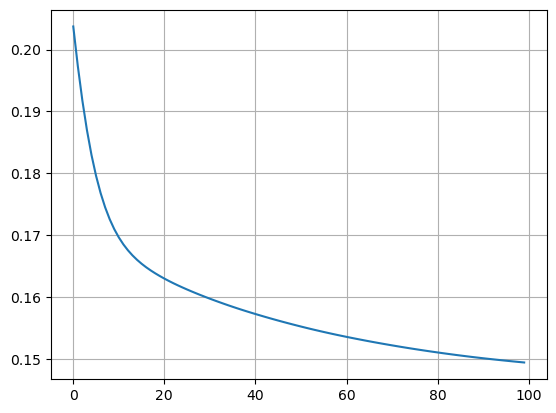

In [33]:
plt.plot(loss_train)
plt.grid()
plt.show()

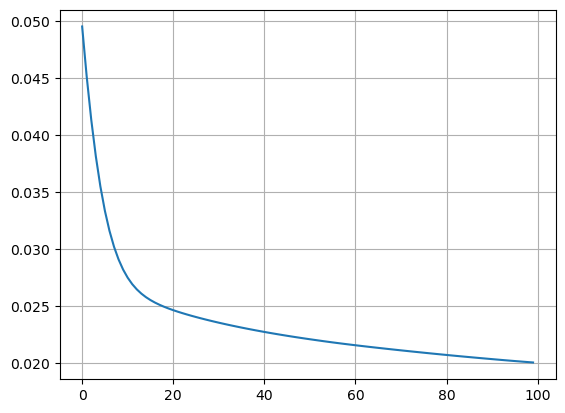

In [34]:
plt.plot(loss_test)
plt.grid()
plt.show()

# Вывод

По графикам можно сказать, что получилось реализовать корректно работающую нейронную сеть, так как при увеличении количества эпох функция ошибок стремится к 0, как на тестовой так и на тренировочной выборке. Переобучения не произошло, так как функция ошибок на тестовой выборке монотонно убывает. Поскольку loss на тестовой выборке порядка 0.02 можно сказать, что разработанная нейронная сеть делает достаточно точные предсказания.